# Perturb Population matrix

How much can we perturb the population covariance until treelets stop bieng able to see the underlying factor structure? ~

## Setup

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.linalg import block_diag
from scipy.linalg import toeplitz
import numpy as np 
import pandas as pd
import sys
import os

In [2]:
sys.path.append("../scripts")
import python_treelet_implementation as pytree
import test_treelets_mixture_models as ttmm
import utils

## Uncorrelated factors and non-overlapping loading vectors 

### Noise free setting

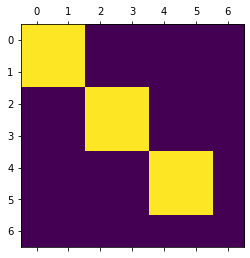

In [9]:
A = B = C = np.ones((2,2))
D = np.zeros(1)
noiseless_matrix = block_diag(A,B,C,D)

plt.matshow(noiseless_matrix)

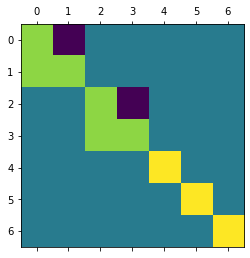

In [42]:
tree = pytree.treelet_decomposition(X = noiseless_matrix, 
                                    L = 7)
basis = tree[3]["B"]
plt.matshow(basis)

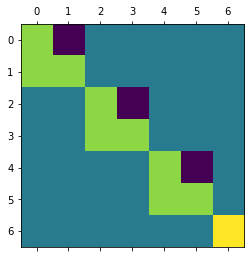

In [43]:
eigen_vectors = np.linalg.eig(noiseless_matrix)[1]
real_valued_eigen = np.real(eigen_vectors)
plt.matshow(real_valued_eigen)

In [44]:
real_valued_eigen

array([[ 0.70710678, -0.70710678,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.70710678, -0.70710678,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.70710678,  0.70710678,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.70710678,
        -0.70710678,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.70710678,
         0.70710678,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ]])

### Tests

In [3]:
import tail_greedy_treelet as tail_greedy
import test_treelets_mixture_models as model
import utils

In [55]:
X = model.three_correlated_factors(V = np.array([[1,1,1,1,0,0,0,0,0,0],
                                                 [0,0,0,0,1,1,1,1,0,0],
                                                 [0,0,0,0,0,0,0,0,1,1]])\
                                   .transpose(),
                                   sigma = 1, 
                                   sigma1 = np.sqrt(290), 
                                   sigma2 = np.sqrt(300),
                                   c1 = -0.3, 
                                   c2 = 0.925,
                                   n = 1000
                                  )

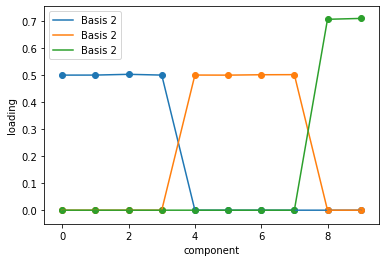

In [62]:
tree = tail_greedy.treelet_decomposition(X,.2)
loadings = pytree.best_basis(tree,3,X)[0]["basis"]

p,l = loadings.shape
for l in range(l): 
    plt.scatter(np.arange(p),loadings[:,l])
    plt.plot(np.arange(p),loadings[:,l], label = "Basis " + str(1+1))
    
plt.xlabel("component")
plt.ylabel("loading")
plt.legend()

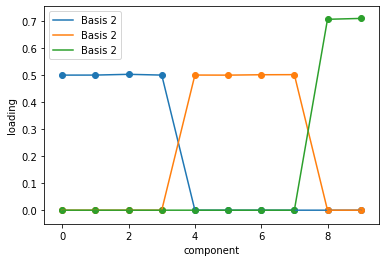

In [63]:
tree = pytree.treelet_decomposition(X,X.shape[1])
loadings = pytree.best_basis(tree,3,X)[0]["basis"]

p,l = loadings.shape
for l in range(l): 
    plt.scatter(np.arange(p),loadings[:,l])
    plt.plot(np.arange(p),loadings[:,l], label = "Basis " + str(1+1))
    
plt.xlabel("component")
plt.ylabel("loading")
plt.legend()